In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

import torch
import torch.nn as nn
import torch.optim as optim

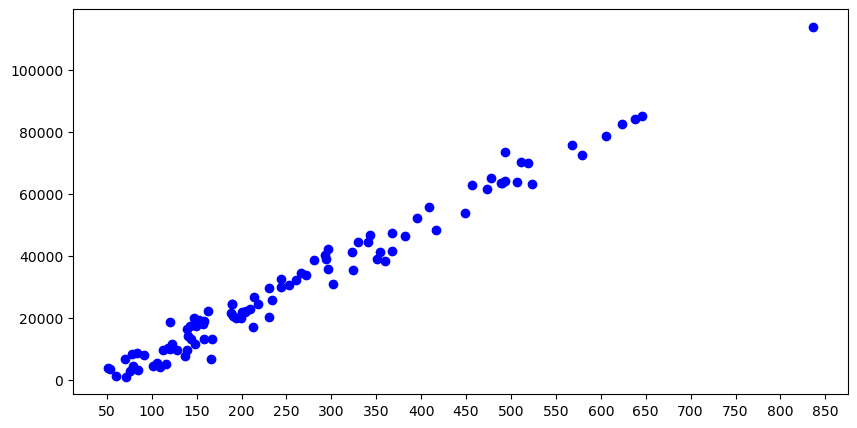

In [2]:
# Gerar dados
x, y, coef = make_regression(n_samples=100, n_features=1, noise=4, coef=True, random_state=42)

# Transformar dados para valores positivos e mais realistas
x = np.abs(x) * 300 + 50  # Aumentar e transladar x
y = np.abs(y) * 1000 + 1000  # Escalar e transladar y

# Preparar para plotar
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 1000, 50))
plt.scatter(x, y, color='blue', label='Dados reais')
plt.show()

In [3]:
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))


In [4]:
X = torch.tensor(X_scaled, dtype=torch.float32)
Y = torch.tensor(Y_scaled, dtype=torch.float32)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 entrada (metragem), 1 saída (preço)

    def forward(self, x):
        return self.linear(x)

In [5]:
# Instanciar o modelo
model = LinearRegressionModel()

# Loss e otimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Treinar o modelo
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/2000], Loss: 0.5945
Epoch [101/2000], Loss: 0.0250
Epoch [201/2000], Loss: 0.0152
Epoch [301/2000], Loss: 0.0130
Epoch [401/2000], Loss: 0.0111
Epoch [501/2000], Loss: 0.0096
Epoch [601/2000], Loss: 0.0083
Epoch [701/2000], Loss: 0.0072
Epoch [801/2000], Loss: 0.0062
Epoch [901/2000], Loss: 0.0054
Epoch [1001/2000], Loss: 0.0047
Epoch [1101/2000], Loss: 0.0042
Epoch [1201/2000], Loss: 0.0037
Epoch [1301/2000], Loss: 0.0033
Epoch [1401/2000], Loss: 0.0029
Epoch [1501/2000], Loss: 0.0026
Epoch [1601/2000], Loss: 0.0024
Epoch [1701/2000], Loss: 0.0022
Epoch [1801/2000], Loss: 0.0020
Epoch [1901/2000], Loss: 0.0018


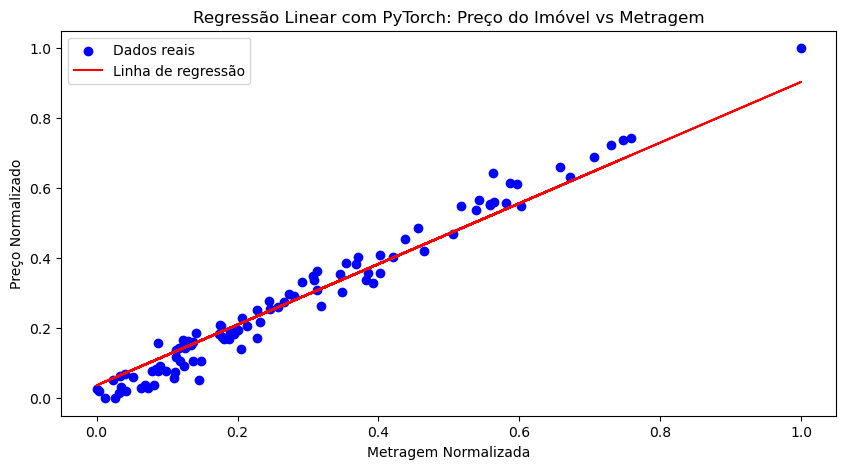

In [7]:
predicted = model(X).detach().numpy()
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled, Y_scaled, color='blue', label='Dados reais')
plt.plot(X_scaled, predicted, color='red', label='Linha de regressão')
plt.xlabel('Metragem Normalizada')
plt.ylabel('Preço Normalizado')
plt.title('Regressão Linear com PyTorch: Preço do Imóvel vs Metragem')
plt.legend()
plt.show()

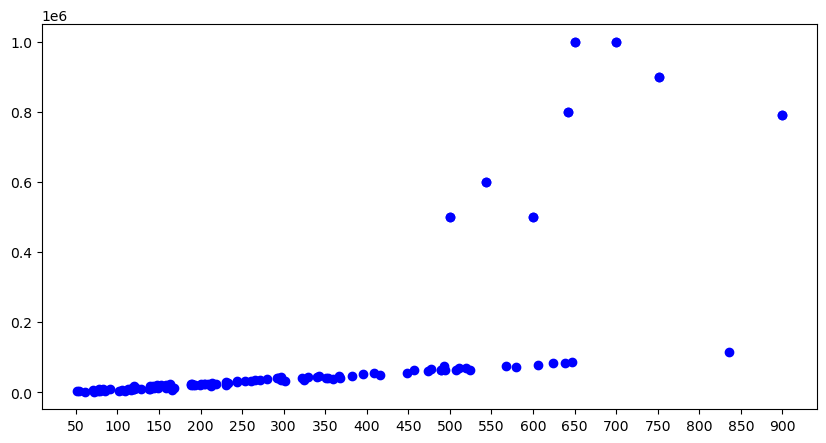

In [14]:
x = np.append(x, [500, 600, 700, 650, 543, 642, 751, 899])  # Adicionar metragens extremas para os outliers
y = np.append(y, [500000, 500000, 1000000, 1000000, 600000, 800000, 900000, 790000])  # Adicionar preços extremos para os outliers

plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 1000, 50))
plt.scatter(x, y, color='blue', label='Dados reais')
plt.show()

In [15]:
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(x.reshape(-1, 1))

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [9]:
X = torch.tensor(X_scaled, dtype=torch.float32)
Y = torch.tensor(Y_scaled, dtype=torch.float32)

# Instanciar o modelo
model = LinearRegressionModel()

# Loss e otimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
# Treinar o modelo
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 1.3122
Epoch [101/1000], Loss: 0.0404
Epoch [201/1000], Loss: 0.0247
Epoch [301/1000], Loss: 0.0244
Epoch [401/1000], Loss: 0.0243
Epoch [501/1000], Loss: 0.0242
Epoch [601/1000], Loss: 0.0242
Epoch [701/1000], Loss: 0.0241
Epoch [801/1000], Loss: 0.0241
Epoch [901/1000], Loss: 0.0241


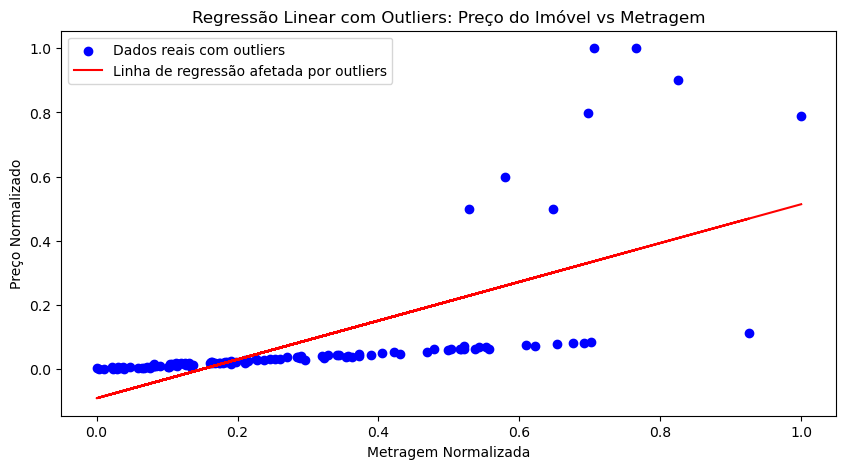

In [11]:
predicted = model(X).detach().numpy()
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled, Y_scaled, color='blue', label='Dados reais com outliers')
plt.plot(X_scaled, predicted, color='red', label='Linha de regressão afetada por outliers')
plt.xlabel('Metragem Normalizada')
plt.ylabel('Preço Normalizado')
plt.title('Regressão Linear com Outliers: Preço do Imóvel vs Metragem')
plt.legend()
plt.show()

In [12]:
model = LinearRegressionModel()

# Loss e otimizador usando Huber Loss
criterion = nn.HuberLoss(delta=0.1)  # O delta pode ser ajustado conforme a necessidade
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Treinar o modelo
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/1000], Loss: 0.0221
Epoch [101/1000], Loss: 0.0118
Epoch [201/1000], Loss: 0.0062
Epoch [301/1000], Loss: 0.0050
Epoch [401/1000], Loss: 0.0048
Epoch [501/1000], Loss: 0.0048
Epoch [601/1000], Loss: 0.0047
Epoch [701/1000], Loss: 0.0047
Epoch [801/1000], Loss: 0.0047
Epoch [901/1000], Loss: 0.0047


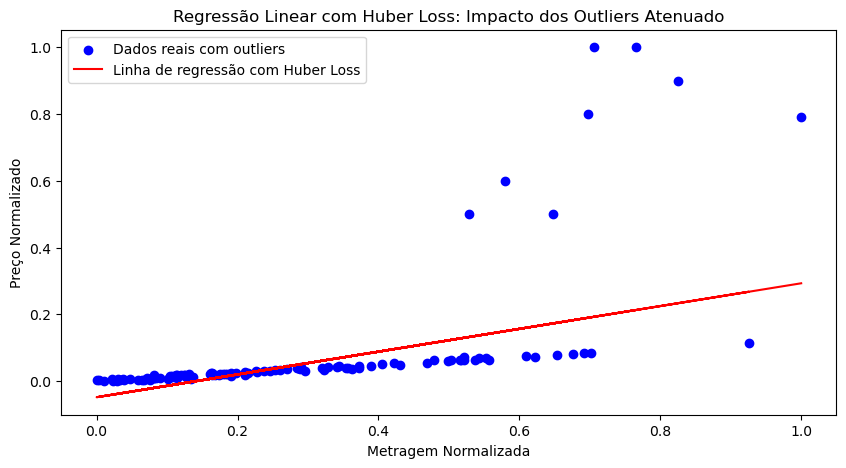

In [13]:
# Plotar os dados e a linha de regressão
predicted = model(X).detach().numpy()
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled, Y_scaled, color='blue', label='Dados reais com outliers')
plt.plot(X_scaled, predicted, color='red', label='Linha de regressão com Huber Loss')
plt.xlabel('Metragem Normalizada')
plt.ylabel('Preço Normalizado')
plt.title('Regressão Linear com Huber Loss: Impacto dos Outliers Atenuado')
plt.legend()
plt.show()

In [18]:
# Criar um tensor de entrada com valores de -10 a 10
x = torch.linspace(-10, 10, 10)

# Definir as funções de ativação
relu = nn.ReLU()
sigmoid = nn.Sigmoid()
mish = nn.Mish()

# Aplicar as funções de ativação
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_mish = mish(x)

# Imprimir os resultados das funções de ativação
print("ReLU Output:")
print(y_relu)
print("\nSigmoid Output:")
print(y_sigmoid)
print("\nMish Output:")
print(y_mish)

ReLU Output:
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.1111,  3.3333,  5.5556,
         7.7778, 10.0000])

Sigmoid Output:
tensor([4.5398e-05, 4.1877e-04, 3.8510e-03, 3.4445e-02, 2.4766e-01, 7.5234e-01,
        9.6555e-01, 9.9615e-01, 9.9958e-01, 9.9995e-01])

Mish Output:
tensor([-4.5399e-04, -3.2578e-03, -2.1436e-02, -1.1679e-01, -3.0792e-01,
         9.8268e-01,  3.3254e+00,  5.5554e+00,  7.7778e+00,  1.0000e+01])
